<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/analise-exploratoria-pre-processamento-de-dados/AEPD_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 03: Pré-Processamento de Dados - Prof. Tatiana Escovedo

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## Prática 1: Transformações Numéricas com dataset Diabetes

### Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/diabetes.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Tratamento de Missings

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

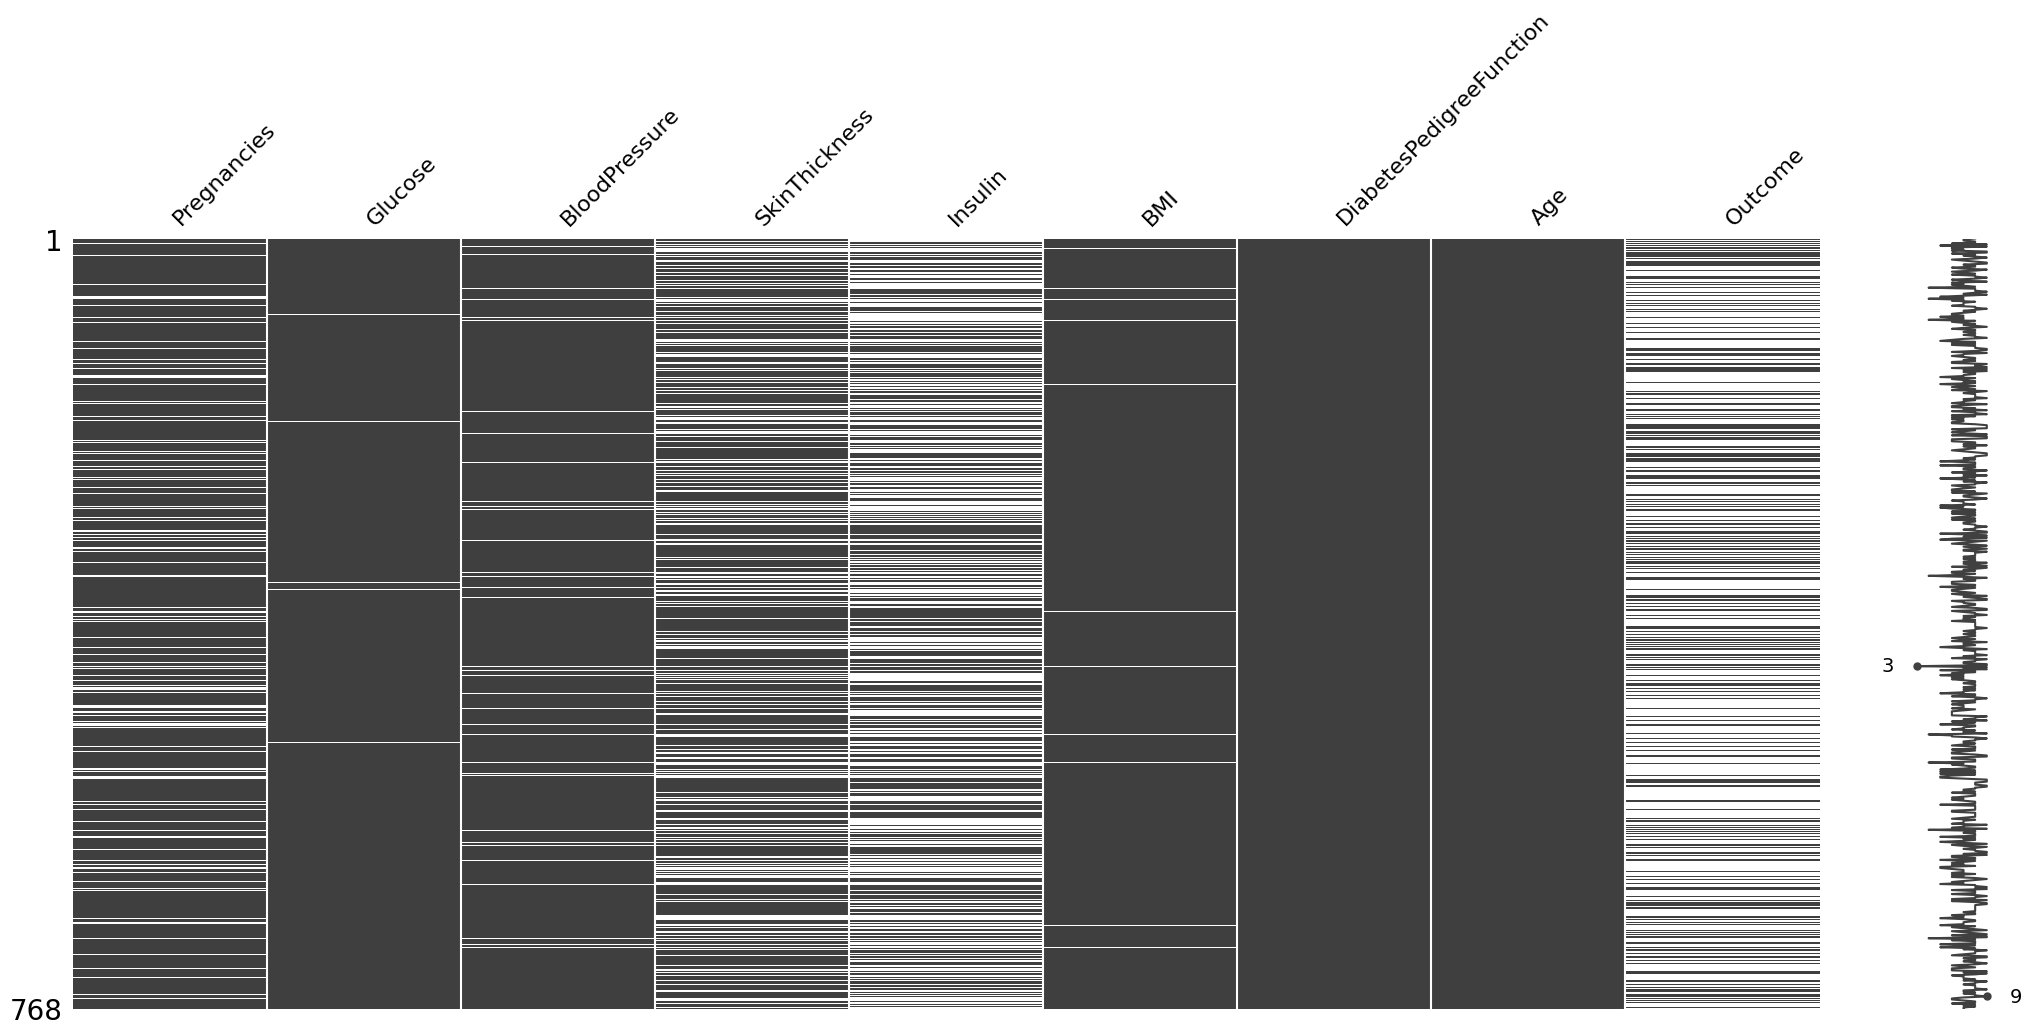

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [ ]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


<Axes: >

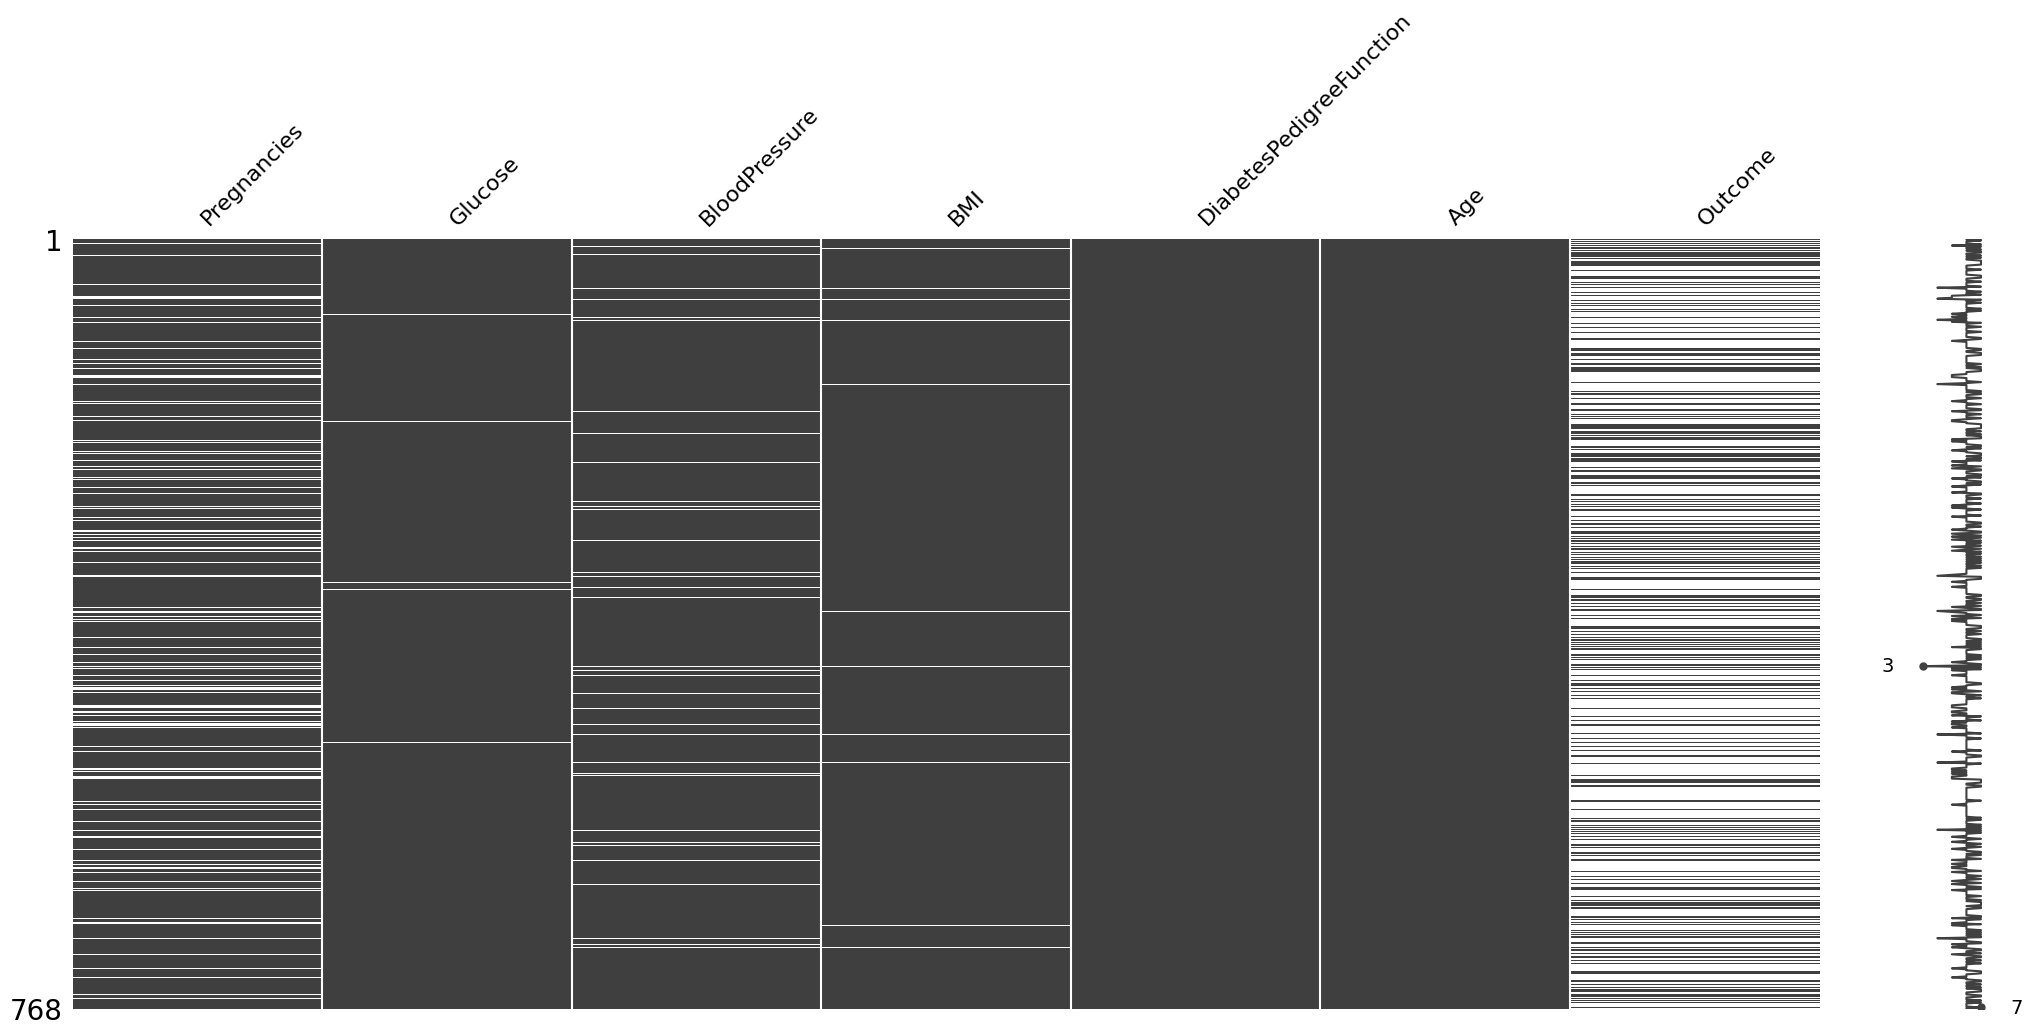

In [ ]:
# removendo as colunas 'SkinThickness' e 'Insulin'
datasetSemMissings.drop(['SkinThickness', 'Insulin'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

<Axes: >

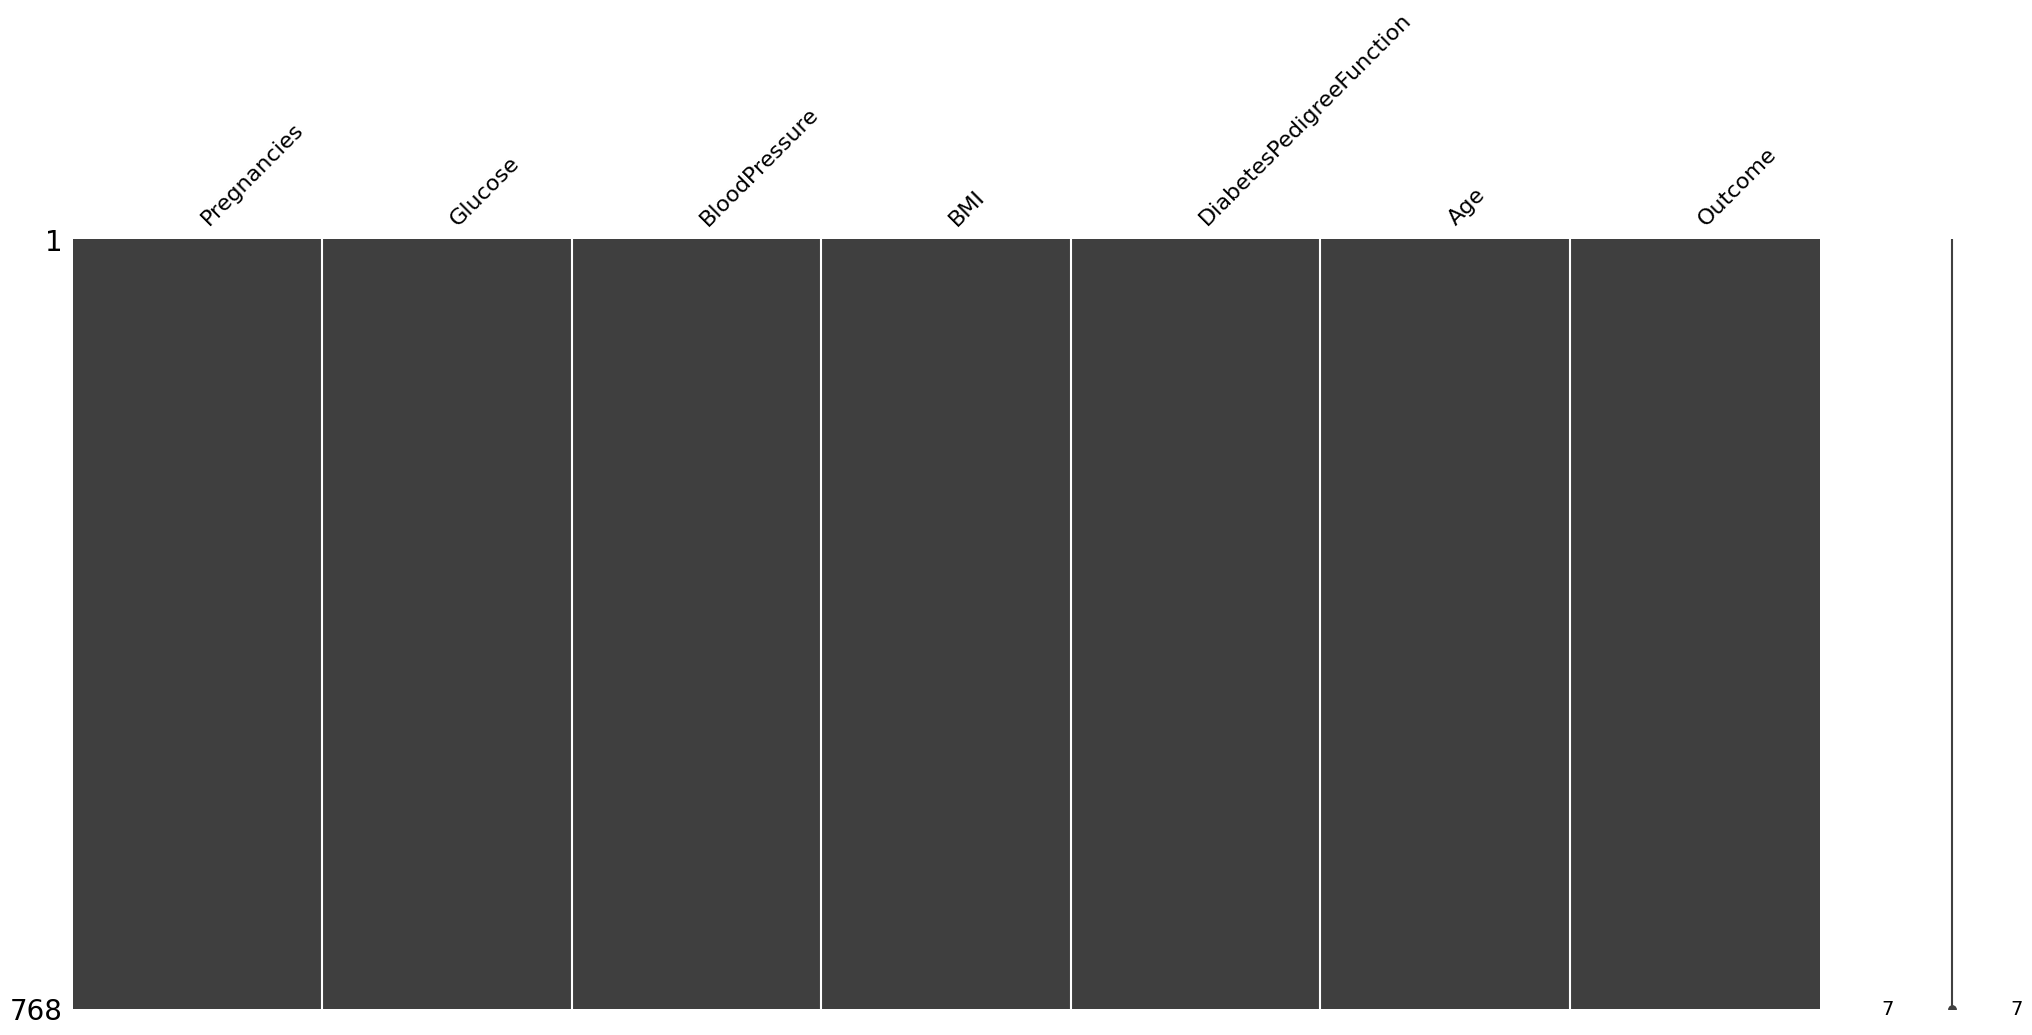

In [ ]:
# substituindo os NaN de 'Pregnancies' e 'Outcome' por 0 - voltando aos valores originais destas colunas
datasetSemMissings['Pregnancies'].fillna(0, inplace=True)
datasetSemMissings['Outcome'].fillna(0, inplace=True)

# substituindo os NaN de 'Glucose', 'BloodPressure' e 'BMI' pela mediana da coluna
datasetSemMissings['Glucose'].fillna(datasetSemMissings['Glucose'].median(), inplace=True)
datasetSemMissings['BloodPressure'].fillna(datasetSemMissings['BloodPressure'].median(), inplace=True)
datasetSemMissings['BMI'].fillna(datasetSemMissings['BMI'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [ ]:
# exibindo as primeiras linhas
datasetSemMissings.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,43.1,2.288,33,1.0


In [ ]:
# verificando nulls no dataset tratado
datasetSemMissings.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Normalização e Padronização

In [ ]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = dataset.values[:,0:8]
Y = dataset.values[:,8]

In [ ]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Normalizados (não inclui a coluna class): \n\n", rescaledX)

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados (não inclui a coluna class): 

 [[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [ ]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Padronizados (não inclui a coluna class): \n\n", rescaledX)

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Padronizados (não inclui a coluna class): 

 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


## Prática 2: Transformações Categóricas com dataset Breast Cancer

### Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/breast-cancer.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
dataset.head()

,Age,Menopause,TumorSize,EnvNodes,NodeCaps,DegMalig,Breast,BreastQuad,Irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


### Tratamento de Missings

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
Age,0
Menopause,0
TumorSize,0
EnvNodes,0
NodeCaps,8
DegMalig,0
Breast,0
BreastQuad,1
Irradiat,0
Class,0


In [ ]:
# exibindo as dimensões do dataset
print(dataset.shape)

# eliminando linhas que tenham ALGUM valor missing
dataset.dropna(how='any', inplace=True) # CUIDADO! Não fizemos uma cópia do dataset original!

# exibindo as dimensões do dataset
print(dataset.shape)

(286, 10)
(277, 10)


In [ ]:
# separando o array em componentes de input e output
X = dataset.values[:,0:9]
y = dataset.values[:,9]

### Codificação Ordinal

In [ ]:
# ordinal encoding para os atributos X
encoded_X = OrdinalEncoder().fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]


### One-hot encoding

In [ ]:
# one hot encode para os atributos X

# Código original da aula, gera erro nas versões mais recentes do scikit-learn (>= 1.2)
# pois o parâmetro sparse foi depreciado. O correto agora é usar o parâmetro sparse_output.
# encoded_X = OneHotEncoder(sparse=False).fit_transform(X)
encoded_X = OneHotEncoder(sparse_output=False).fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]]
